#### **Project : The Prediction of Flight delays and cancellations**


##### **Context :**

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


In this project we have 3 CSV files containing the different datasets to merge after (during the analysis).
- airlines.CSV
- airports.CSV
- flights.CSV

<p>Thusly the airlines dataset describes the features related to every airline, it contains the following columns:</p>
<ol>
  <li> IATA_CODE; Airline Identifier : The Primary Key</li>
  <li> AIRLINE ;Airport's Name / Foreigh Key from airports</li>
</ol>

<p>Concerning the airports dataset describes the features related to the airports (obviously XD), it contains the following columns:</p>
<ol>
  <li> IATA_CODE; Location Identifier : 3 characters identifying every airport location</li>
  <li> AIRPORT; Airport's Name / Foreigh Key from airports</li>
  <li>CITY</li>
  <li>STATE</li>
  <li>COUNTRY : Country name of the airport</li>
  <li>LATITUDE : The Latitude of the Airport</li>
  <li>LONGITUDE : The Longitude of the Airport</li>
</ol>

<p>And finally the flights dataset containing the following columns:</p>
<ol>
  <li> YEAR; the Year of the Flight Trip</li>
  <li> MONTH </li>
  <li>DAY</li>
  <li>COUNTRY : Country name of the airport</li>
  <li>...</li>
</ol>

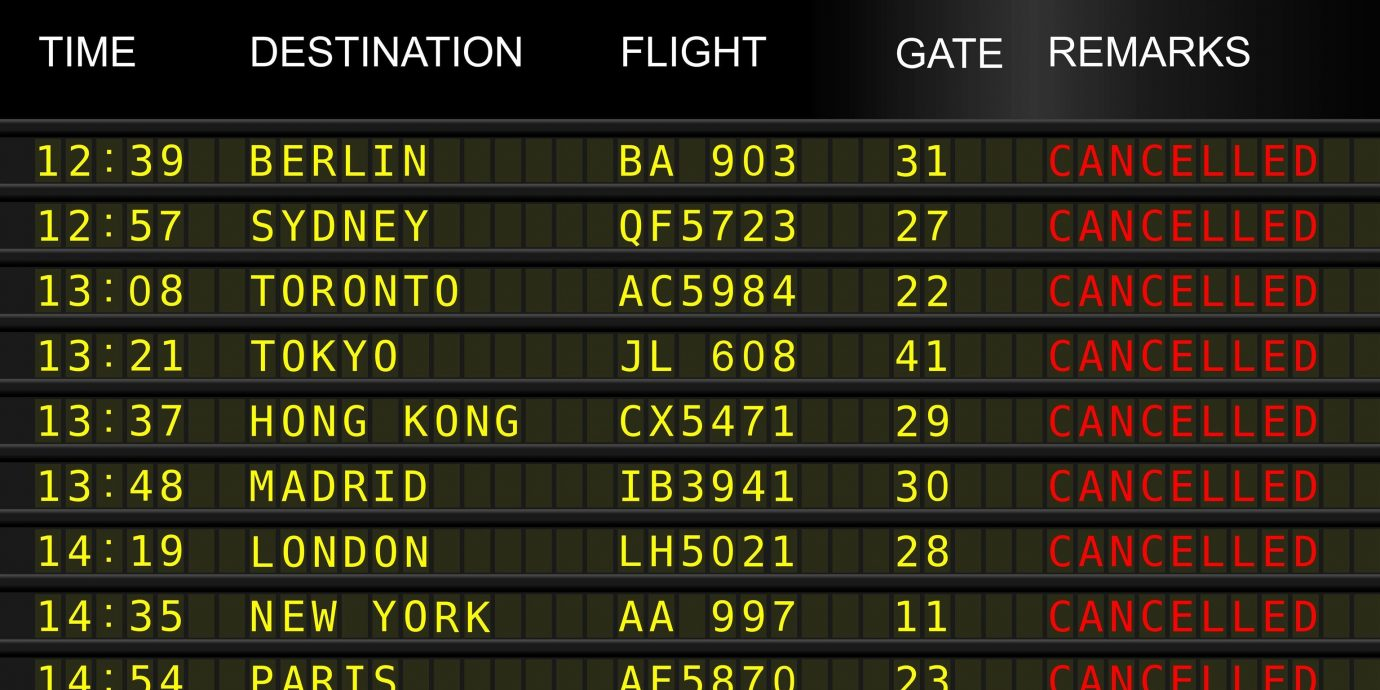

#### **Part 1 : Getting the DATA**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Increase the size of seaborn plots
sns.set(rc = {'figure.figsize': (8, 8)})

In [4]:
raw_data_airlines = pd.read_csv("../input/flight-delays/airlines.csv")
raw_data_airports = pd.read_csv("../input/flight-delays/airports.csv")
raw_data_flights = pd.read_csv("../input/flight-delays/flights.csv")

In [5]:
raw_data_airports.head()

In [6]:
display(raw_data_airlines.head(), "The Shape of the Airlines DataSet : {}".format(raw_data_airlines.shape))

In [7]:
display(raw_data_airports.head(), "The Shape of the Airports DataSet : {}".format(raw_data_airports.shape))

In [8]:
display(raw_data_flights.head(), "The Shape of the Flights DataSet : {}".format(raw_data_flights.shape))

#### **Copying the Data in order to compare the final data results with the raw data**

In [9]:
df_airlines = raw_data_airlines.copy()
df_airports = raw_data_airports.copy()
df_flights = raw_data_flights.copy()

In [10]:
# This function would be useful whenever we have a bunch of dataframe and we want to compare btw the final results and the raw data
def copy_dataframe(df):
    df = df.copy()
    return df

In [11]:
# a quick check for the copied data
display(df_airlines.head(), df_airports.tail(), df_flights.head())

> Exploring the data types and the info about the datasets

In [12]:
# For the airlines DataFrame
display(df_airlines.info(),
        df_airports.info(),
        df_flights.info())

In [13]:
# Displaying the Unique Values of each columns of the flights dataset
for column in df_flights:
  if len(df_flights[column].unique()) < 10:
    print('The Number of Values for the Feature {} : {} ---- {}'.format(column, df_flights[column].unique(), len(df_flights[column].unique())))
  else:
    print('The Number of values for the Feature {} : {}'.format(column, len(df_flights[column].unique())))


For now we will keep the columns of the airports and airlines dataframes (we could remove LATITUDE and LONGITUDE from the airports dataset), and we will explore deeply the flights dataset to check for eventually missings values, outliers, the number of unique values, distribution and at long last correlation between the different features to finally merge the different datasets into one final dataset to be able to build our ML model.

In [14]:
df_flights.isna().any()

In [15]:
df_flights.isna().mean()

In [16]:
# import seaborn as sns
# fig, ax = plt.subplots(figsize=(8,8))
# sns.heatmap(df_flights.isnull(), cbar = False, yticklabels = False, vmin=0.5, vmax=0.7, ax = ax)

Checking for duplicated rows

In [17]:
### Checking for the DataSet shape before removing the Data
print("The Shape of the Data Before removing duplicate rows is {}".format(df_flights.shape))

### The Code to remove the duplicate rows
duplicate_rows_df_flights = df_flights[df_flights.duplicated()]

### Displaying the Duplicate rows DataFrame
display("The Shape of the Duplicate Rows DataFrame is {}".format(duplicate_rows_df_flights.shape))

So there's no duplicate rows in the dataframe, let's move on toturing the Data.

#### Dropping the Rows with a big % of missing data

In [18]:
columns_2_drop = ['CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

In [19]:
df_flights = df_flights.drop(columns = columns_2_drop, axis = 1)

In [20]:
# Checking for the size of the remaining columns
df_flights.shape[1]

In [21]:
df_flights.columns

In [22]:
# We need to see all the dataframe, so we will use this pandas function
pd.set_option('max_columns', None)

In [23]:
df_flights.iloc[25:36, :]

In [24]:
# Investigate all unique values in each column
{column: len(df_flights[column].unique()) for column in df_flights.columns}

With the code above we can see that the 'TAIL_NUMBER' and the 'FLIGHT_NUMBER' have a lot of unique values which will affect the speed of the processing when we will be developing the model (by Hot Encoding the Data). 

In [25]:
pd.set_option('max_columns', None)

In [26]:
df_flights

#### **Dropping the Uneeded Cols**

In [27]:
# we will begin by reseting the Index
df_flights = df_flights.set_index("FLIGHT_NUMBER")

In [28]:
df_flights.head()

In [29]:
df_flights = df_flights.sort_index(ascending = True)

In [30]:
df_flights.head()

In [31]:
df_flights = df_flights.drop(columns = ['TAIL_NUMBER', 'YEAR', 'MONTH', 'DAY'])

In [32]:
df_flights.tail()

In [33]:
df_flights.corr()

In [34]:
# Displaying the Counting plots for Categorical Data
categorical_columns = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']


for cat_col in categorical_columns:
    plt.figure()
    sns.countplot(x = cat_col, data = df_flights.iloc[150:200, :], hue = 'CANCELLED',  palette = "Set1")

In [35]:
# Another function to deal with the categorical data
from matplotlib import rcParams

categorical_columns = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

# Defining the Categorical DataFrame
categorical_df_fligths = df_flights.select_dtypes("object")

# Displaying the last 4 rows of the categorical dataframe
categorical_df_fligths.tail()

In [36]:
plot_kinds = ['count', 'strip', 'swarm', '']

for cat_col in categorical_columns:
    for plot_kind in plot_kinds:
        display('The Factor Plot of the {} Kind'.format(plot_kind.upper()))
        sns.factorplot(cat_col, data = categorical_df_fligths.iloc[150:200, :], kind = plot_kind)
        plt.gcf().set_size_inches(15, 8)

**Corollary :** By loooking at the different plots above, we can't really possibly draw conclusions from the differents insights, so for our analysis we will just move on trying to hot encode our dataset and move towards building a ML Logistic Regression Model.

#### **Hot Encoding the Data**

**Remark:**
- OneHotEncoder for Unordered (Nominal Data).
- OrdinalEncoder for Ordered Data (Ordinal Data).

In our case the data seems to be Nominal One , because it doesn't pursue a logical order.

In [ ]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummy_data = pd.get_dummies(df[column], prefix = prefix)
        df = pd.concat([df, dummy_data], axis = 1)
        df = df.drop(column, axis = 1) # we remove the columns once we get our dummies
    return df

In [ ]:
# One-hot encode nominal feature columns
df_flights = onehot_encode(
        df_flights,
        column_dict={
            'AIRLINE': 'AL',
            'ORIGIN_AIRPORT': 'OA',
            'DESTINATION_AIRPORT': 'DA'
        }
)

In [ ]:
df_flights.iloc[1000:1010, :]

### Fill NaN values with the mean of each column

In [2]:
# Displaying the Columns with one missing value or more
missing_value_df_flights = df_flights.loc[:, df_flights.isna().sum() > 0]

missing_value_df_flights.isna().mean()

In [ ]:
# Fill the remaining missing values with the mean value of every column
cols_with_remaining_missing_values = df_flights.loc[:, df_flights.isna().sum() > 0].columns

cols_with_remaining_missing_values

In [ ]:
# Now we will fill the remaining missing values
for column in cols_with_remaining_missing_values:
    df_flights[column] = df_flights[column].fillna(df_flights[column].mean())

In [ ]:
# Checking for the filling step
df_flights.isna().sum()

##### **Conclusion :** Finally there's no missing value in our dataset, now we can scale our data and split the dataset to build the ML model.

In [ ]:
# Splitting the Data into Xs and y
X = df_flights.drop('CANCELLED', axis = 1)

In [ ]:
y = df_flights['CANCELLED', axis = 1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
# Scale X with a standard scaler
scaler = StandardScaler()
scaler.fit(X_train)
    
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)